## Observations and Insights 

In [49]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
cd_df = pd.merge (mouse_metadata,study_results, on='Mouse ID', how = 'inner')

# Display the data table for preview
cd_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [50]:
# Checking the number of mice.
mouseid_count=cd_df['Mouse ID'].nunique()

#Number of mice Data Frame
nm = {'Number of Mice' : [mouseid_count]}
df = pd.DataFrame(data=nm)
df

,Number of Mice
0,249


In [51]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = cd_df.loc[cd_df.duplicated(subset=['Mouse ID','Timepoint'], keep=False), ["Mouse ID","Timepoint"]]
duplicates

,Mouse ID,Timepoint
908,g989,0
909,g989,0
910,g989,5
911,g989,5
912,g989,10
913,g989,10
914,g989,15
915,g989,15
916,g989,20
917,g989,20


In [52]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates = cd_df.loc[cd_df.duplicated(subset=['Mouse ID','Timepoint'], keep=False),cd_df.columns]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [53]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
c_df = cd_df[cd_df['Mouse ID']!= 'g989']
c_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [54]:
# Checking the number of mice in the clean DataFrame.
# Checking the number of mice.
mouseid_count=c_df['Mouse ID'].nunique()

#Number of mice Data Frame
nm = {'Number of Mice' : [mouseid_count]}
df = pd.DataFrame(data=nm)
df

,Number of Mice
0,248


## Summary Statistics

In [55]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
r_mean = c_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
r_median = c_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
r_var = c_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
r_std = c_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
r_sem = c_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
r_summary = pd.DataFrame({'Tumor Volume Mean':r_mean, 
                        'Tumor Volume Median':r_median,
                        'Tumor Volume Variance':r_var,
                        'Tumor Volume Standard Deviation':r_std,
                        'Tumor Volume SEM':r_sem})

r_summary.style.format({'Mean':'{:.2f}', 
                        'Median':'{:.2f}', 
                        'Variance':'{:.2f}',
                        'Standard Deviation':'{:.2f}',
                        'SEM':'{:.2f}'})

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [56]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
ngb = c_df.groupby('Drug Regimen')
r_summary_two = ngb.agg(['mean', 'median', 'var', 'std','sem'])['Tumor Volume (mm3)']
r_summary_two.style.format({'mean':'{:.2f}', 
                        'median':'{:.2f}', 
                        'var':'{:.2f}',
                        'std':'{:.2f}',
                        'sem':'{:.2f}'})

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

In [57]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
# Groupby cmpt - count of mice per treatment
cmpt = c_df.groupby(['Drug Regimen']).count()['Mouse ID']

# Count of mice per treatment DataFrame
cmpt_summary = pd.DataFrame({'Drug Regimen':cmpt})
cmpt_summary.index.name = None
cmpt_summary.sort_values(['Drug Regimen'], ascending = False)


,Drug Regimen
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Ceftamin,178
Infubinol,178
Propriva,148


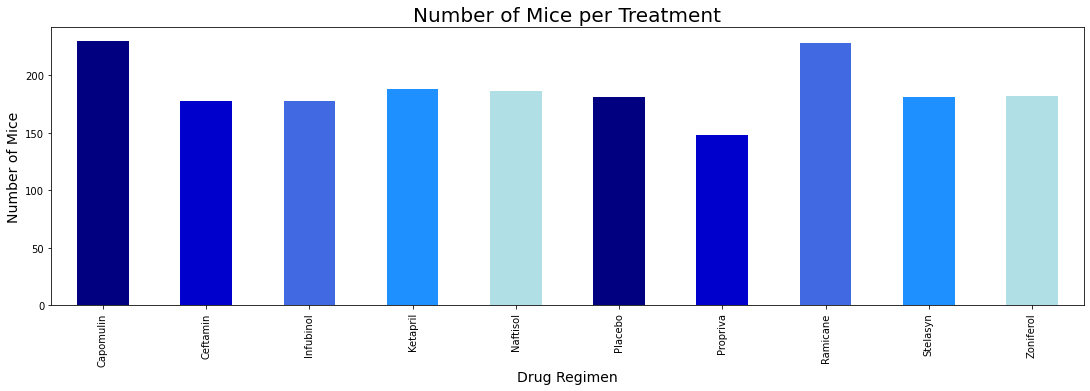

In [58]:
# Unique mice tested on each drug regimen using pandas
cmpt.plot.bar(figsize = (15,5), color = ['navy', 'mediumblue', 'royalblue' ,'dodgerblue' ,'powderblue'])
plt.tight_layout()
plt.xlabel('Drug Regimen', fontsize = 14)
plt.ylabel('Number of Mice', fontsize = 14)
plt.title('Number of Mice per Treatment', fontsize = 20)
# plt.legend(cmpt.index)
plt.show()

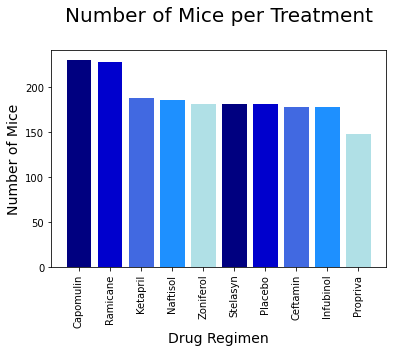

In [59]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x = c_df['Drug Regimen'].value_counts().index
y = c_df['Drug Regimen'].value_counts().values
plt.bar(x,y,color = ['navy', 'mediumblue', 'royalblue' ,'dodgerblue' ,'powderblue'], align='center')
t_l = [value for value in x]
plt.xticks(t_l, rotation ='vertical')
plt.xlabel('Drug Regimen', fontsize = 14)
plt.ylabel('Number of Mice', fontsize = 14)
plt.title('Number of Mice per Treatment\n', fontsize = 20)
plt.show()

In [60]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Gender groupby
g_gender_df = c_df.groupby(['Sex']).count()['Mouse ID']
g_gender_df

g_per = (g_gender_df/(g_gender_df.sum())*100)
g_per

gender_summary = pd.DataFrame({'Sex':g_gender_df, 'Percentage of Sex':g_per})
gender_summary.index.name = None
gender_summary.style.format({'Percentage of Sex':'{:.2f}%'})

,Sex,Percentage of Sex
Female,922,49.04%
Male,958,50.96%


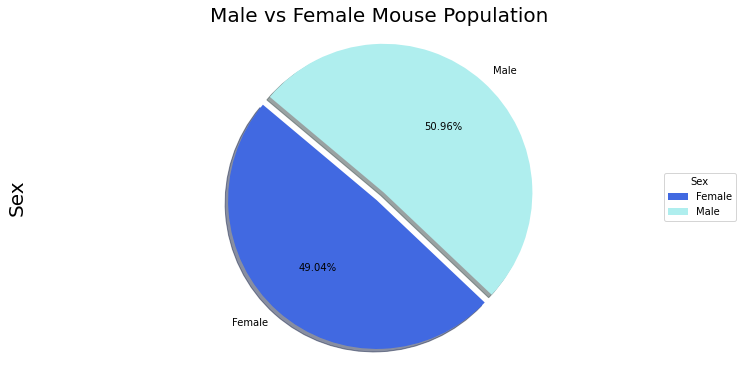

In [61]:
# Using pandas
explode = (0.07,0)
g_gender_df.plot.pie(figsize=(10, 5),explode = explode, colors = ['royalblue','paleturquoise'], shadow = True, autopct='%1.02f%%',startangle=140)
plt.tight_layout()
plt.axis('equal')
plt.ylabel('Sex', fontsize = 20)
plt.title('Male vs Female Mouse Population', fontsize = 20)
plt.legend(title="Sex",loc="center left", bbox_to_anchor=(0.9, 0, 0.5, 1))
plt.show()

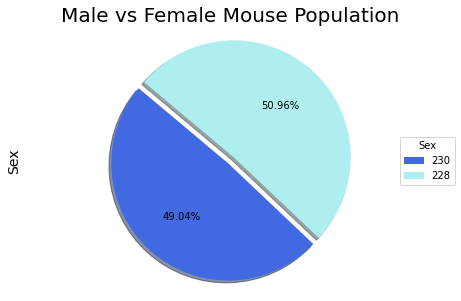

In [62]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(g_gender_df,explode =explode,colors = ['royalblue','paleturquoise'], shadow = True, autopct='%1.02f%%',startangle=140)
plt.tight_layout()
plt.axis('equal')
plt.ylabel('Sex', fontsize = 14)
plt.title('Male vs Female Mouse Population', fontsize = 20)
plt.legend(y,title="Sex",loc="center left", bbox_to_anchor=(0.9, 0, 0.5, 1))
plt.show()

## Quartiles, Outliers and Boxplots

In [63]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [64]:
#This one is perfect
ftv = c_df.groupby(['Drug Regimen','Mouse ID']).last()[['Timepoint','Tumor Volume (mm3)']]
ftv_df = ftv.reset_index().sort_values(['Timepoint'], ascending = 'True')

ftv_df = ftv_df[ftv_df['Drug Regimen']!= 'Ketapril']
ftv_df = ftv_df[ftv_df['Drug Regimen']!= 'Naftisol']
ftv_df = ftv_df[ftv_df['Drug Regimen']!= 'Placebo']
ftv_df = ftv_df[ftv_df['Drug Regimen']!= 'Propriva']
ftv_df = ftv_df[ftv_df['Drug Regimen']!= 'Stelasyn']
ftv_df = ftv_df[ftv_df['Drug Regimen']!= 'Zoniferol']
ftv_df.style.format({'Tumor Volume (mm3)':'{:.2f}'})

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
41,Ceftamin,t573,0,45.00
45,Ceftamin,x226,0,45.00
43,Ceftamin,u153,0,45.00
26,Ceftamin,b447,0,45.00
30,Ceftamin,h531,5,47.78
55,Infubinol,c326,5,36.32
62,Infubinol,m756,5,47.01
68,Infubinol,v339,5,46.25
196,Ramicane,w678,5,43.17
65,Infubinol,o813,5,45.70


In [65]:
#This one is perfect
reg = c_df[c_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
reg= reg.groupby(['Drug Regimen','Mouse ID']).last()[['Timepoint','Tumor Volume (mm3)']]
reg = reg.reset_index().sort_values(['Timepoint'], ascending = 'True')
reg.style.format({'Tumor Volume (mm3)':'{:.2f}'})


,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
26,Ceftamin,b447,0,45.00
41,Ceftamin,t573,0,45.00
43,Ceftamin,u153,0,45.00
45,Ceftamin,x226,0,45.00
97,Ramicane,w678,5,43.17
30,Ceftamin,h531,5,47.78
55,Infubinol,c326,5,36.32
62,Infubinol,m756,5,47.01
68,Infubinol,v339,5,46.25
65,Infubinol,o813,5,45.70


In [66]:
# Put treatments into a list for for loop (and later for plot labels)
r = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
ftv_list = []

# Locate the rows which contain mice on each drug and get the tumor volumes
for dr in r:
    ftv_list_vol = reg.loc[reg['Drug Regimen']== dr, 'Tumor Volume (mm3)']

    # add subset to 
    ftv_list.append(ftv_list_vol)

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = ftv_list_vol.quantile([0.25,0.5,0.75])
    lq = quartiles[0.25]
    uq = quartiles[0.75]
    mean = ftv_list_vol.mean()
    iqr = uq - lq
    lb = lq - (1.5 * iqr)
    ub = uq + (1.5 * iqr)
    
    # Determine outliers using upper and lower bounds
    outliers = ftv_list_vol.loc[(ftv_list_vol < lb)|(ftv_list_vol > ub)]

    #Printing Results
    print (f'{dr} Regimen')
    print (f'Average Tumor Volume (mm3) for {dr} is: {round(mean,2)}')
    print (f'Final Tumor Volume (mm3) IQR for {dr} is: {round(iqr,2)}')
    print (f'Final Tumor Volume (mm3) for {dr} below {round(lb,2)} could be outliers.')
    print (f'Final Tumor Volume (mm3) for {dr} below {round(ub,2)} could be outliers.')
    print (f'Number of outliers for {dr} is: {outliers.count()}')
    if outliers.count()>0:
        for i in outliers.index:
            print(f'Outlier for Final Tumor Volume (mm3) is {round(outliers[i],2)}')
    print (f'---------------------------------------------------------------------')


Capomulin Regimen
Average Tumor Volume (mm3) for Capomulin is: 36.67
Final Tumor Volume (mm3) IQR for Capomulin is: 7.78
Final Tumor Volume (mm3) for Capomulin below 20.7 could be outliers.
Final Tumor Volume (mm3) for Capomulin below 51.83 could be outliers.
Number of outliers for Capomulin is: 0
---------------------------------------------------------------------
Ramicane Regimen
Average Tumor Volume (mm3) for Ramicane is: 36.19
Final Tumor Volume (mm3) IQR for Ramicane is: 9.1
Final Tumor Volume (mm3) for Ramicane below 17.91 could be outliers.
Final Tumor Volume (mm3) for Ramicane below 54.31 could be outliers.
Number of outliers for Ramicane is: 0
---------------------------------------------------------------------
Infubinol Regimen
Average Tumor Volume (mm3) for Infubinol is: 58.18
Final Tumor Volume (mm3) IQR for Infubinol is: 11.48
Final Tumor Volume (mm3) for Infubinol below 36.83 could be outliers.
Final Tumor Volume (mm3) for Infubinol below 82.74 could be outliers.
Number

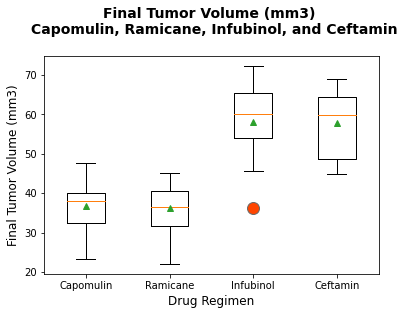

In [82]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ftp = plt.subplots()
flierprops = dict(marker='o', markerfacecolor='orangered', markersize=12,
                  linestyle='none', markeredgecolor='dimgray')
ftp.boxplot(ftv_list, labels = r, flierprops = flierprops, showmeans = True,vert = True)
ftp.set_title ('Final Tumor Volume (mm3) \n Capomulin, Ramicane, Infubinol, and Ceftamin\n', fontsize = 14, fontweight = 'bold')
ftp.set_xlabel ('Drug Regimen', fontsize = 12)
ftp.set_ylabel ('Final Tumor Volume (mm3)', fontsize = 12)
plt.show()

## Line and Scatter Plots

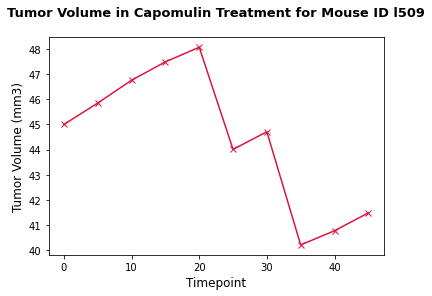

In [68]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Capomulin DataFrame
cdf = c_df.loc[c_df['Drug Regimen']== 'Capomulin']

# Mouse ID and Dataframe
mid = 'l509'
m_df = cdf.loc[cdf['Mouse ID']== mid]

# Generate a line plot
tv = plt.plot(m_df['Timepoint'], m_df['Tumor Volume (mm3)'], marker = 'x', color = 'crimson')

# Set x, y label and title
plt.title(f'Tumor Volume in Capomulin Treatment for Mouse ID {mid}\n', fontsize = 13, fontweight = 'bold')
plt.xlabel('Timepoint', fontsize = 12)
plt.ylabel('Tumor Volume (mm3)', fontsize = 12)
plt.show()

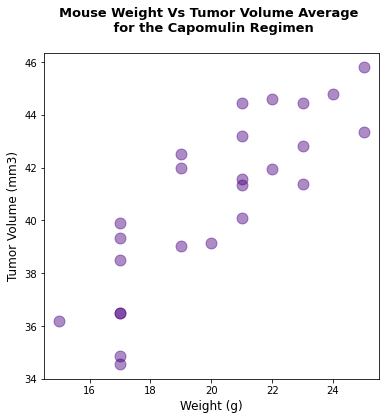

In [109]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots(figsize = (6,6))
acv = cdf.groupby(['Mouse ID']).mean()

plt.scatter(acv['Weight (g)'], acv['Tumor Volume (mm3)'], color = 'indigo', s = 120, alpha = 0.450)
plt.title(f'Mouse Weight Vs Tumor Volume Average \n for the Capomulin Regimen\n', fontsize = 13, fontweight = 'bold')
plt.xlabel('Weight (g)', fontsize = 12)
plt.ylabel('Tumor Volume (mm3)', fontsize = 12)
plt.show()

## Correlation and Regression

In [104]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mwa = acv['Weight (g)']
mta = acv['Tumor Volume (mm3)']

# Calculate the correlation
corr = round(st.pearsonr(xv,yv)[0],2)
print(f'The correlation between mouse weight and tumor vol is {correlation}')

# Calculate linear regression values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(xv,yv)

# y = mx + b
rv = xv * slope + intercept
le = 'y = ' + str(round(slope,2)) + 'x + ' +str(round(intercept,2))


# Calculating r-square
rsquare = round(rvalue**2,2)
print (f'Slope: {round(slope,2)}')
print (f'Intercept: {round(intercept,2)}')
print (f'Standard Error: {stderr}')
print (f'R square : {rsquare}')

The correlation between mouse weight and tumor vol is 0.84
Slope: 0.95
Intercept: 21.55
Standard Error: 0.1275435903320134
R square : 0.71


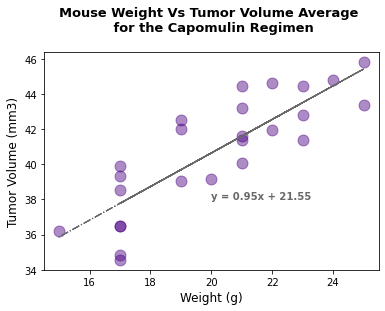

In [119]:
plt.scatter(acv['Weight (g)'], acv['Tumor Volume (mm3)'], color = 'indigo', s = 120, alpha = 0.450)
plt.title(f'Mouse Weight Vs Tumor Volume Average \n for the Capomulin Regimen\n', fontsize = 13, fontweight = 'bold')
plt.xlabel('Weight (g)', fontsize = 12)
plt.ylabel('Tumor Volume (mm3)', fontsize = 12)
plt.plot(acv['Weight (g)'],rv, 'r-.',linewidth =1.2, color = 'dimgray')
plt.annotate(le, (20,38), fontsize = 10 , color = 'dimgray',fontweight = 'bold')
plt.show()